In [9]:
# Enable libraries
import pandas as pd # data wrangling tools
import altair as alt # data viz tools
alt.themes.enable('opaque') # ensures charts have solid white background

ThemeRegistry.enable('opaque')

In [58]:
# Read in data
full = pd.read_csv('data/mt-livestock-counts.csv')

# Filter data to make it more manageable for data viz practice
include_counties = ['MISSOULA','BEAVERHEAD','LEWIS AND CLARK','LINCOLN','RAVALLI','POWELL']
include_types = ['Cattle']
# See all types with `full['Type'].unique()`
data = full[
    full['County Name'].isin(include_counties)
    & full['Type'].isin(include_types)
    & (full['Year'] == 2018)
]

In [59]:
# See what's in the data
data

,Year,County Id,County Name,Type,Count
675,2018,4,MISSOULA,Cattle,3914.0
676,2018,5,LEWIS AND CLARK,Cattle,25917.0
684,2018,13,RAVALLI,Cattle,17080.0
689,2018,18,BEAVERHEAD,Cattle,102714.0
699,2018,28,POWELL,Cattle,30438.0
727,2018,56,LINCOLN,Cattle,2024.0


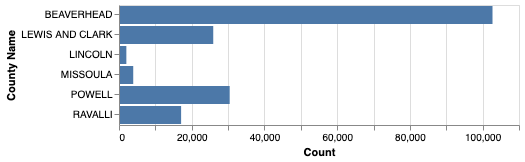

In [60]:
### Basic chart
# Use bar marks
# Encode year on vertical (y) axis
# Encoding 

alt.Chart(data).mark_bar().encode(
    x='Count',
    y='County Name'
)

# CHECK: Does this chart match the data?

## Quick exercises

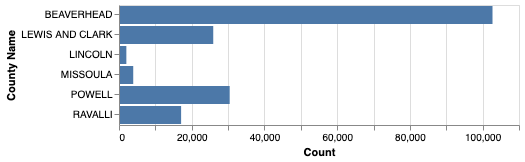

In [61]:
# Task 1
# Modify this code so it plots chart with points instead of bars
# Replace `mark_bar()` with `mark_point()`

alt.Chart(data).mark_bar().encode(
    x='Count',
    y='County Name'
)

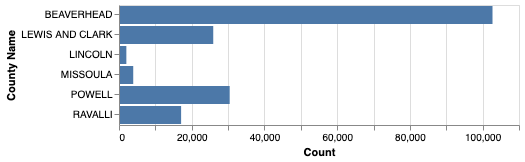

In [31]:
# Task 3
# Flip chart orientation
# swap "x" and "y" in below

alt.Chart(data).mark_bar().encode(
    x='Count',
    y='County Name'
)

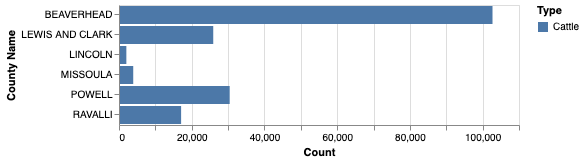

In [85]:
# Task 4
# Look at multiple types of animals at once instead of cows

include_types_multiple = ['Cattle'] # Delete this line
# include_types_multiple = ['Cattle', 'Sheep'] # Uncomment this line (remove '#' at start)

data_with_sheep = full[
    full['County Name'].isin(include_counties)
    & full['Type'].isin(include_types_multiple)
    & (full['Year'] == 2018)
]

alt.Chart(data_with_sheep).mark_bar().encode(
    x='Count',
    y='County Name',
    color='Type', # Encodes animal type by color
)

# See what happens with mark_point() instead of mark_bar()
# Note bars stack by default, points don't
# This can be changed!

## Other examples using this data

In [78]:
# Re-filter data
include_types = ['Cattle','Goats','Sheep','Poultry']
more_animals = full[
    full['County Name'].isin(include_counties)
    & full['Type'].isin(include_types)
]

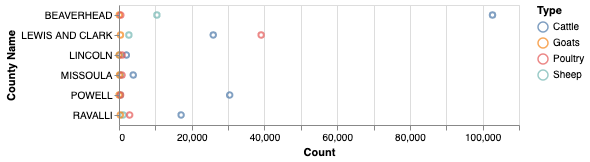

In [79]:
data = more_animals[more_animals['Year'] == 2018]
alt.Chart(data).mark_point().encode(
    x='Count',
    y='County Name',
    color='Type',
)

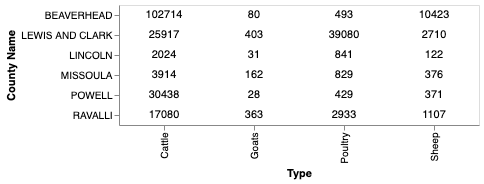

In [80]:
# A table!
# Note `mark_text()`
alt.Chart(data).mark_text().encode(
    text='Count',
    y='County Name',
    x='Type',
)

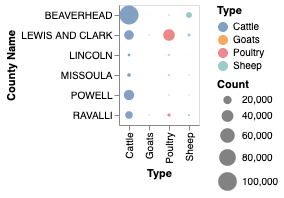

In [81]:
# Encode counts with size
alt.Chart(data).mark_circle().encode(
    size='Count',
    y='County Name',
    x='Type',
    color='Type', # No reason fields can't be encoded more than one way
)

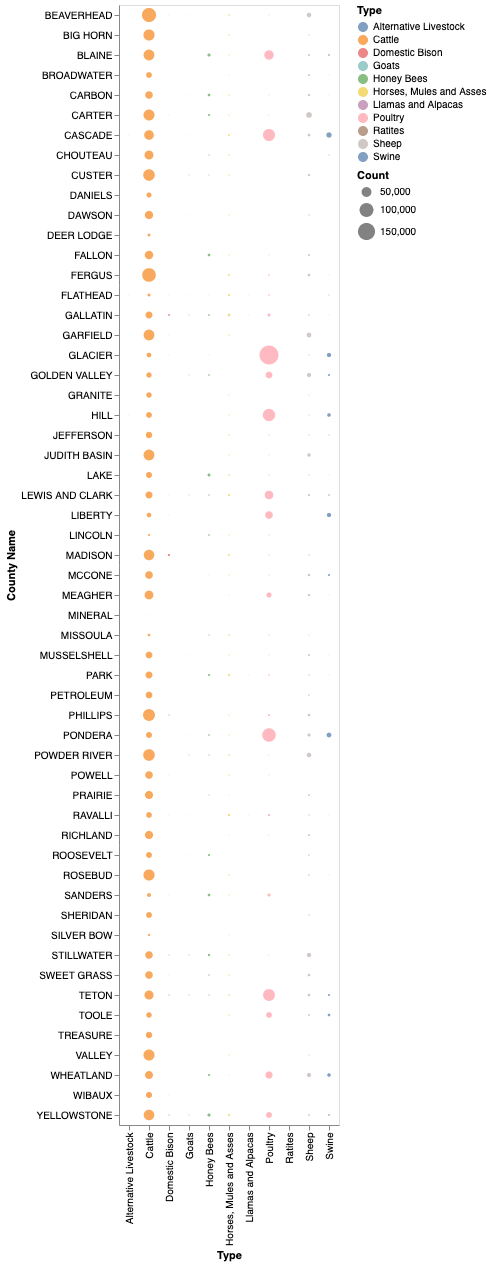

In [82]:
# Now with the full data set!

alt.Chart(full[full['Year'] == 2018]).mark_circle().encode(
    size='Count',
    y='County Name',
    x='Type',
    color='Type', # No reason fields can't be encoded more than one way
)

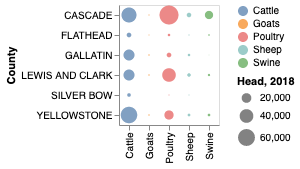

In [102]:
# How about ag near big cities. Which "urban" county in Montana has the most cows?

include_counties_urban = ['YELLOWSTONE','MISSOULLA','CASCADE','GALLATIN','LEWIS AND CLARK','FLATHEAD','SILVER BOW']
# Let's strip the tabel down some too
include_types_urban = ['Cattle','Goats','Sheep','Poultry','Swine']
# Let's look just at a few 
urban_counties = full[
    full['County Name'].isin(include_counties_urban)
    & full['Type'].isin(include_types_urban)
    & (full['Year'] == 2018)
]

alt.Chart(urban_counties).mark_circle().encode(
    size=alt.Size('Count', title='Head, 2018'),
    y=alt.Y('County Name', title='County'),
    x=alt.X('Type', title=''),
    color=alt.Color('Type', title=''),
    tooltip=['County Name', 'Type','Count'],
)